## Data Analytics Assesment: Mini-Project  
*Name:* Subham Kumar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [12]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


----
Data loading and overview

In [13]:
# Importing dataset 
df = pd.read_excel ('E:/Datasets/sample_superstore.xls', sheet_name='Orders')

In [27]:
# columns contained in data
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discount_Sales', 'New_Discount'],
      dtype='object')

In [37]:
# Printing standard deviation, count, mean, max, min
column_list = list(df.columns)
for col in column_list[17:]:
    print(df[col].describe())
    print("\n")

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64


count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64


count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64


count     9994.000000
mean       206.872201
std        560.920590
min          0.399600
25%         15.552000
50%         49.041000
75%        188.946000
max      20374.632000
Name: Discount_Sa

In [39]:
# Finding Missing Values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Discount_Sales    0
New_Discount      0
dtype: int64

----
Calculating per unit price

In [42]:
# Converting datetime field into pandas time object
import datetime as dt
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [44]:
# Calculating unit per price and adding a column in dataset
price_per_unit = df["Sales"] / df["Quantity"]
df["Price/Unit"] = price_per_unit

In [46]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount_Sales,New_Discount,Price/Unit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,235.76400,222.666000,130.9800
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,658.74600,622.149000,243.9800
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,13.15800,12.427000,7.3100
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,861.81975,813.940875,191.5155
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,20.13120,19.012800,11.1840


----
Finding out the monthly revenue 

In [49]:
# Creating column with year and month
df['month_year'] = df['Order Date'].dt.to_period('M')

In [59]:
# Creating new dataframe add adding specific columns 
monthly_revenue = pd.DataFrame(df.groupby(df['month_year'].dt.strftime('%Y : %B'))['Sales'].sum())
monthly_revenue

,Sales
month_year,
2015 : April,28295.3450
2015 : August,27909.4685
2015 : December,69545.6205
2015 : February,4519.8920
2015 : January,14236.8950
2015 : July,33946.3930
2015 : June,34595.1276
2015 : March,55691.0090
2015 : May,23648.2870


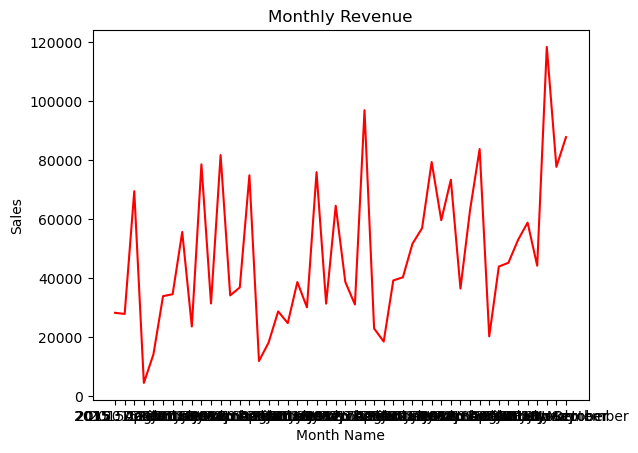

In [55]:
# Plotting the dataset
plt.title('Monthly Revenue')
plt.xlabel('Month Name')
plt.ylabel('Sales')
plt.plot(monthly_revenue, 'r')
plt.show()

In [66]:
# Describing the dataset
monthly_revenue.describe()

,Sales
count,48.000000
mean,47858.351256
std,25195.890700
min,4519.892000
25%,29790.096125
50%,39803.248500
75%,65833.343625
max,118447.825000


------
## Finding out the yearly revenue 

In [70]:
# Creating new dataframe yearly
yearly_revenue = pd.DataFrame(df.groupby(df['month_year'].dt.strftime('%Y'))['Sales'].sum())
yearly_revenue

,Sales
month_year,
2015,484247.4981
2016,470532.5090
2017,609205.5980
2018,733215.2552


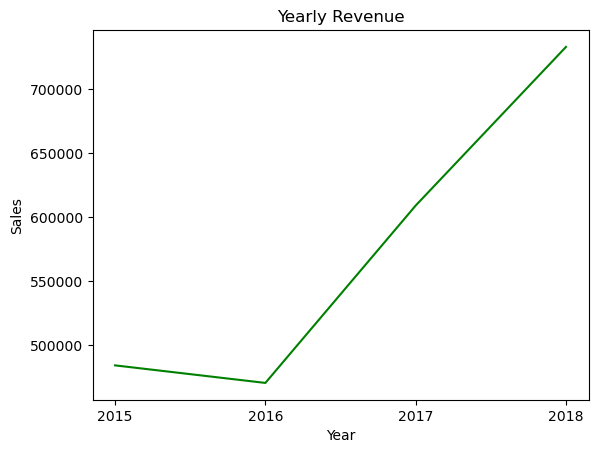

In [72]:
# Plotting the dataframe
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.plot(yearly_revenue, 'g')
plt.show()

In [74]:
# Describing the dataset
yearly_revenue.describe()

,Sales
count,4.000000
mean,574300.215075
std,122949.318005
min,470532.509000
25%,480818.750825
50%,546726.548050
75%,640208.012300
max,733215.255200


------
## Finding out the monthly growth rate

In [82]:
# Finding monthly growth rate with the formula
monthly_revenue["Monthly Growth Rate"]=(monthly_revenue['Sales']-monthly_revenue['Sales'].shift())/monthly_revenue['Sales'].shift()*100
monthly_revenue

,Sales,Monthly Growth Rate
month_year,,
2015 : April,28295.3450,NaN
2015 : August,27909.4685,-1.363746
2015 : December,69545.6205,149.182891
2015 : February,4519.8920,-93.500824
2015 : January,14236.8950,214.983079
2015 : July,33946.3930,138.439583
2015 : June,34595.1276,1.911056
2015 : March,55691.0090,60.979343
2015 : May,23648.2870,-57.536616


In [85]:
# Finding Maximum of the dataset
print(np.max(monthly_revenue['Monthly Growth Rate']))

232.4922295640272


In [89]:
# Finding the coorosponding month
monthly_revenue.loc[monthly_revenue['Monthly Growth Rate'] == 232.4922295640271]

,Sales,Monthly Growth Rate
month_year,,


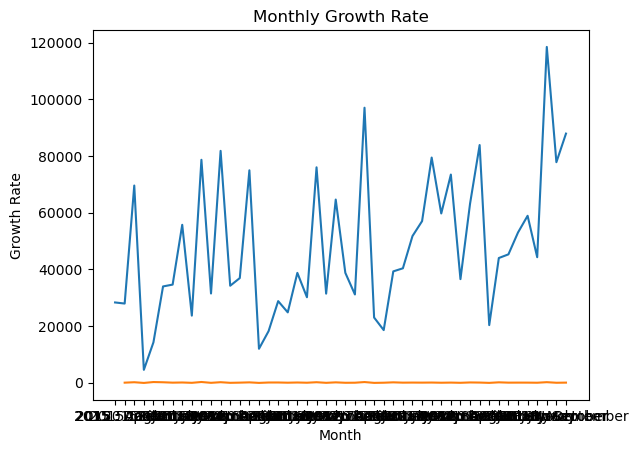

In [93]:
# Plotting the graph
plt.title('Monthly Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.plot(monthly_revenue)

---------
## Finding out the most and least sold product id

In [96]:
# Creating a new dataset
product_id_df = pd.DataFrame(df.groupby(df["Product ID"])["Quantity"].sum())
product_id_df

,Quantity
Product ID,
FUR-BO-10000112,9
FUR-BO-10000330,10
FUR-BO-10000362,14
FUR-BO-10000468,21
FUR-BO-10000711,12
...,...
TEC-PH-10004912,11
TEC-PH-10004922,19
TEC-PH-10004924,8


In [98]:
# Finding the most value
print(np.max(product_id_df["Quantity"]))

75


In [100]:
# Finding the corrosponding value
product_id_df.loc[product_id_df['Quantity'] == 75]

,Quantity
Product ID,
TEC-AC-10003832,75


------
### Finding out the customer who bought most and least from us in terms of quantity

In [111]:
# Creating a dataset
customer_name_df = pd.DataFrame(df.groupby(df["Customer Name"])["Quantity"].sum())
customer_name_df

,Quantity
Customer Name,
Aaron Bergman,13
Aaron Hawkins,54
Aaron Smayling,48
Adam Bellavance,56
Adam Hart,75
...,...
Xylona Preis,100
Yana Sorensen,58
Yoseph Carroll,31


In [113]:
# Finding the max value
print(np.max(customer_name_df["Quantity"]))

150


In [115]:
customer_name_df.loc[customer_name_df['Quantity'] == 150]

,Quantity
Customer Name,
Jonathan Doherty,150


------
### Finding out the customer who bought most and least from us in terms of value

In [124]:
# Creating dataset
customer_by_value = pd.DataFrame(df.groupby(df["Customer Name"])["Sales"].sum())
customer_by_value

,Sales
Customer Name,
Aaron Bergman,886.156
Aaron Hawkins,1744.700
Aaron Smayling,3050.692
Adam Bellavance,7755.620
Adam Hart,3250.337
...,...
Xylona Preis,2374.658
Yana Sorensen,6720.444
Yoseph Carroll,5454.350


In [126]:
# Finding max value
print(np.max(customer_by_value["Sales"]))

25043.05


In [128]:
# Finding the value corrosponding to above value
customer_by_value.loc[customer_by_value['Sales'] == 25043.05]

,Sales
Customer Name,
Sean Miller,25043.05


-------
#### Finding out the majority and minority customer cities on basis of No of Customers

In [133]:
# Creating the dataframe by counting the customer
city_customer_group=df.groupby("City").count()['Customer Name']
city_customer_group = pd.DataFrame(city_customer_group)
city_customer_group['Customer Count'] = city_customer_group['Customer Name']
city_customer_group.drop('Customer Name',  axis='columns', inplace=True)
city_customer_group

,Customer Count
City,
Aberdeen,1
Abilene,1
Akron,21
Albuquerque,14
Alexandria,16
...,...
Woonsocket,4
Yonkers,15
York,5


In [135]:
# Finding max value
print(np.max(city_customer_group["Customer Count"]))

915


In [139]:
# Finding the value corrosponding to above value
city_customer_group.loc[city_customer_group['Customer Count'] == 915]

,Customer Count
City,
New York City,915


In [141]:
# Finding max value
print(np.min(city_customer_group["Customer Count"]))

1


In [143]:
# Finding the value corrosponding to above value
city_customer_group.loc[city_customer_group['Customer Count'] == 1]

,Customer Count
City,
Aberdeen,1
Abilene,1
Antioch,1
Arlington Heights,1
Atlantic City,1
...,...
Vacaville,1
Waterloo,1
Waukesha,1


-----
Salesle

In [153]:
# Creating dataframe
city_by_sale = pd.DataFrame(df.groupby(df["City"])["Sales"].sum())
city_by_sale.head(10)

,Sales
City,
Aberdeen,25.5000
Abilene,1.3920
Akron,2729.9860
Albuquerque,2220.1600
Alexandria,5519.5700
Allen,290.2060
Allentown,853.2520
Altoona,20.4510
Amarillo,3773.0628


In [149]:
# Finding max value
print(np.max(city_by_sale["Sales"]))

256368.161


In [155]:
# Finding the value corrosponding to above value
city_by_sale.loc[city_by_sale['Sales'] == 256368.161]

,Sales
City,
New York City,256368.161


In [157]:
# Finding min value
print(np.min(city_by_sale["Sales"]))

1.3919999999999997


In [159]:
# Finding the value corrosponding to above value
city_by_sale.loc[city_by_sale['Sales'] == 1.3919999999999997]

,Sales
City,
Abilene,1.392


--------
#### Number of Quantity Sold

In [162]:
# Creating dataframe
city_by_quantity = pd.DataFrame(df.groupby(df["City"])["Quantity"].sum())
city_by_quantity

,Quantity
City,
Aberdeen,3
Abilene,2
Akron,65
Albuquerque,65
Alexandria,84
...,...
Woonsocket,15
Yonkers,57
York,19


In [164]:
# Finding max value
print(np.max(city_by_quantity["Quantity"]))

3417


In [166]:
# Finding the value corrosponding to above value
city_by_quantity.loc[city_by_quantity['Quantity'] == 3417]

,Quantity
City,
New York City,3417


In [168]:
# Finding min value
print(np.min(city_by_quantity["Quantity"]))

1


In [170]:
# Finding the value corrosponding to above value
city_by_quantity.loc[city_by_quantity['Quantity'] == 1]

,Quantity
City,
Elyria,1
Iowa City,1
Jupiter,1
Lindenhurst,1
Littleton,1
Port Orange,1


----
#### Find out the most and least sold product category from the store

#### Quantity based

In [176]:
# Creating the dataframe
product_category_by_quantity = pd.DataFrame(df.groupby(df["Category"])["Quantity"].sum())
product_category_by_quantity

,Quantity
Category,
Furniture,8028
Office Supplies,22906
Technology,6939


In [178]:
# Finding min value
print(np.max(product_category_by_quantity["Quantity"]))

22906


In [180]:
# Finding the value corrosponding to above value
product_category_by_quantity.loc[product_category_by_quantity['Quantity'] == 22906]

,Quantity
Category,
Office Supplies,22906


In [182]:
# Finding min value
print(np.min(product_category_by_quantity["Quantity"]))

6939


In [184]:
# Finding the value corrosponding to above value
product_category_by_quantity.loc[product_category_by_quantity['Quantity'] == 6939]

,Quantity
Category,
Technology,6939


-------
Value Based 

In [187]:
# Creating Dataframe
product_category_by_value = pd.DataFrame(df.groupby(df["Category"])["Sales"].sum())
product_category_by_value

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [189]:
# Finding max value
print(np.max(product_category_by_value["Sales"]))

836154.033


In [191]:
# Finding the value corrosponding to above value
product_category_by_value.loc[product_category_by_value['Sales'] == 836154.0329999966]

,Sales
Category,


In [193]:
# Finding min value
print(np.min(product_category_by_value["Sales"]))

719047.032


In [195]:
# Finding the value corrosponding to above value
product_category_by_value.loc[product_category_by_value['Sales'] == 719047.0320000029]

,Sales
Category,


-------
### Find out the most and least sold product sub category from the store By Quantity

In [208]:
# Creating Dataframe
subcat_by_quantity = pd.DataFrame(df.groupby(df["Sub-Category"])["Quantity"].sum())
subcat_by_quantity

,Quantity
Sub-Category,
Accessories,2976
Appliances,1729
Art,3000
Binders,5974
Bookcases,868
Chairs,2356
Copiers,234
Envelopes,906
Fasteners,914


In [210]:
# Finding max value
print(np.max(subcat_by_quantity["Quantity"]))

5974


In [212]:
# Finding the value corrosponding to above value
subcat_by_quantity.loc[subcat_by_quantity['Quantity'] == 5974]

,Quantity
Sub-Category,
Binders,5974


In [214]:
# Finding min value
print(np.min(subcat_by_quantity["Quantity"]))

234


In [225]:
# Finding the value corrosponding to above value
subcat_by_quantity.loc[subcat_by_quantity['Quantity'] == 234]

,Quantity
Sub-Category,
Copiers,234


----
### By Value

In [227]:
# Creating Dataframe
subcat_by_value = pd.DataFrame(df.groupby(df["Sub-Category"])["Sales"].sum())
subcat_by_value

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


In [229]:
# Finding max value
print(np.max(subcat_by_value["Sales"]))

330007.054


In [231]:
# Finding the value corrosponding to above value
subcat_by_value.loc[subcat_by_value['Sales'] == 330007.0540000001]

,Sales
Sub-Category,


In [233]:
# Finding min value
print(np.min(subcat_by_value["Sales"]))

3024.28


In [235]:
# Finding the value corrosponding to above value
subcat_by_value.loc[subcat_by_value['Sales'] == 3024.2799999999997]

,Sales
Sub-Category,


### *create a discount column*

In [23]:
df['Discount_Sales'] = df.apply(lambda row: row.Sales - row.Sales*.1, axis=1)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount_Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,235.76400
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,658.74600
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,13.15800
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,861.81975
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,20.13120


In [25]:
# Discount 15% 
df['New_Discount']= df.Sales-.15*df.Sales
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount_Sales,New_Discount
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,235.76400,222.666000
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,658.74600,622.149000
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,13.15800,12.427000
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,861.81975,813.940875
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,20.13120,19.012800
